In [1]:
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [5]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib

train_data = pd.read_csv('/content/gdrive/MyDrive/Dravidian_Abusive/tamil_train.csv')

vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(train_data['text'])
y_train = train_data['labels']

svm_model = SVC(random_state=42)

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
    'degree': [3, 4],
}

grid_search = GridSearchCV(svm_model, param_grid, cv=3, verbose=1, scoring='accuracy')

grid_search.fit(X_train_tfidf, y_train)

best_svm_model = grid_search.best_estimator_

print("Best Parameters:", grid_search.best_params_)

y_train_pred = best_svm_model.predict(X_train_tfidf)

print("Classification Report:")
print(classification_report(y_train, y_train_pred))

accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", accuracy)

joblib.dump(best_svm_model, '/content/gdrive/MyDrive/Dravidian_Abusive/svm_abusive_detector_model.pkl')
joblib.dump(vectorizer, '/content/gdrive/MyDrive/Dravidian_Abusive/svm_vectorizer.pkl')


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters: {'C': 1, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf'}
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.89      9720
           1       0.88      0.91      0.89      9249

    accuracy                           0.89     18969
   macro avg       0.89      0.89      0.89     18969
weighted avg       0.89      0.89      0.89     18969

Training Accuracy: 0.8935631820338447


['/content/gdrive/MyDrive/Dravidian_Abusive/svm_vectorizer.pkl']

In [6]:
import joblib


In [7]:
svm_model = joblib.load('/content/gdrive/MyDrive/Dravidian_Abusive/svm_abusive_detector_model.pkl')
vectorizer = joblib.load('/content/gdrive/MyDrive/Dravidian_Abusive/svm_vectorizer.pkl')


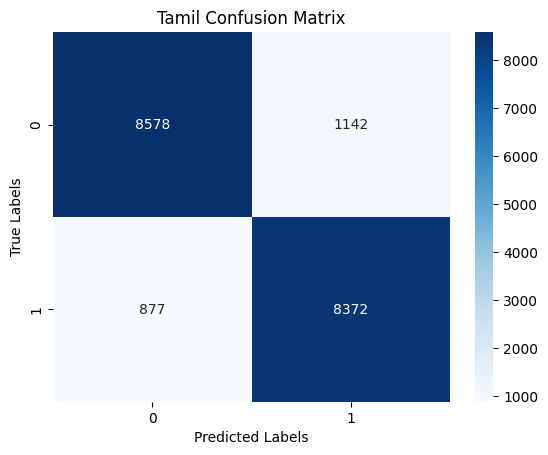

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Tamil Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


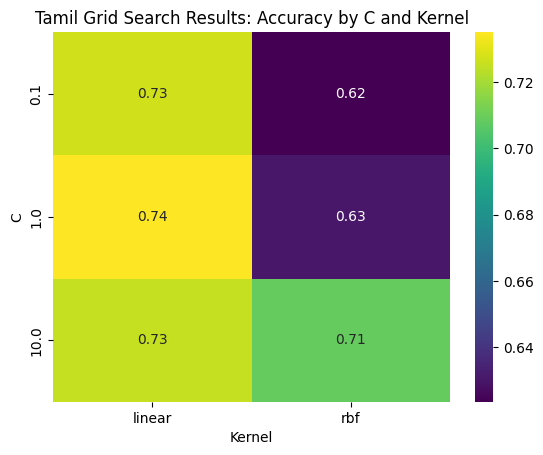

In [10]:
results = pd.DataFrame(grid_search.cv_results_)
pivot_table = results.pivot_table(values='mean_test_score', index='param_C', columns='param_kernel')
sns.heatmap(pivot_table, annot=True, cmap='viridis')
plt.title('Tamil Grid Search Results: Accuracy by C and Kernel')
plt.xlabel('Kernel')
plt.ylabel('C')
plt.show()


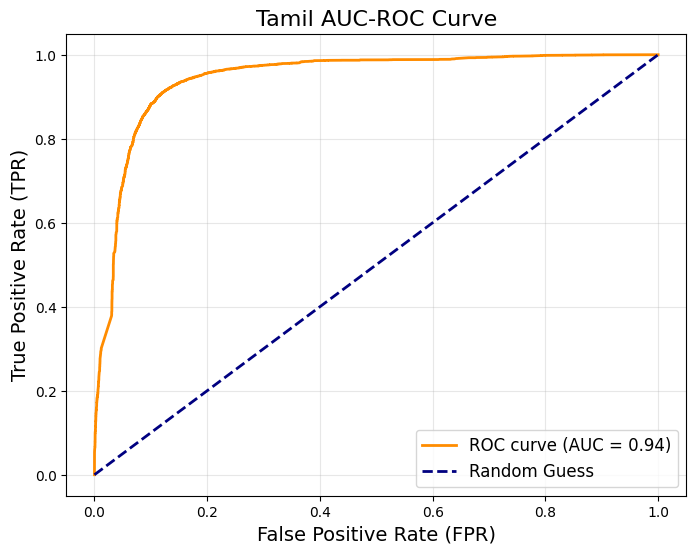

In [11]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

y_scores = best_svm_model.decision_function(X_train_tfidf)
fpr, tpr, thresholds = roc_curve(y_train, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')

plt.xlabel('False Positive Rate (FPR)', fontsize=14)
plt.ylabel('True Positive Rate (TPR)', fontsize=14)
plt.title('Tamil AUC-ROC Curve', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.show()


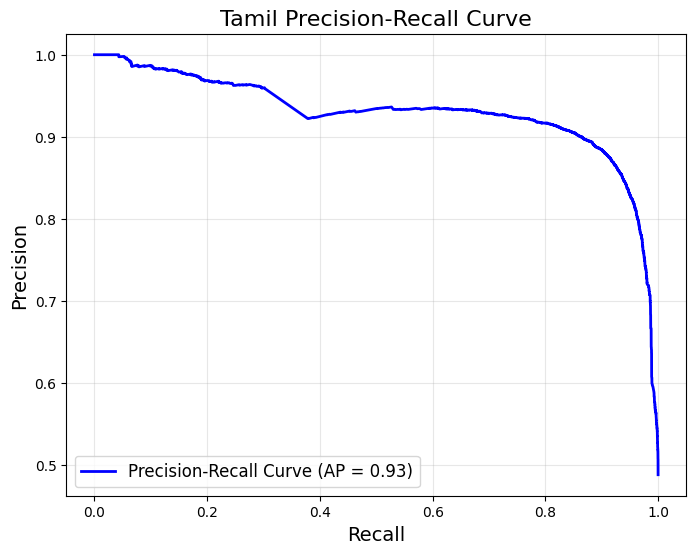

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score


y_scores = best_svm_model.decision_function(X_train_tfidf)

precision, recall, thresholds = precision_recall_curve(y_train, y_scores)
average_precision = average_precision_score(y_train, y_scores)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AP = {average_precision:.2f})', color='blue', linewidth=2)

plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Tamil Precision-Recall Curve', fontsize=16)
plt.legend(loc='lower left', fontsize=12)
plt.grid(alpha=0.3)
plt.show()